In [28]:
# import essential libraries
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.ticker as ticker

# ml
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import linear_model

## Data preprocessing

In [8]:
vpop = pd.read_csv('https://raw.githubusercontent.com/tvo10/DSCT/main/Capstone/Data%20Wrangling/vpop.csv')
vpop.head()

,names,genres,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min
0,LayLaLay,Pop/Ballad,0.549,0.568,6,-8.159,0,0.1760,0.0859,0.0000,0.0863,0.351,174.038,3.862067
1,Dù Cho Mai Về Sau (Acoustic Version),Indie/Hip Hop,0.640,0.355,11,-7.637,1,0.0876,0.8000,0.0000,0.1100,0.815,145.142,3.558167
2,Xin Đừng Nhấc Máy,Indie/Hip Hop,0.873,0.755,7,-4.506,1,0.1400,0.2930,0.0000,0.0881,0.773,94.017,3.124233
3,Có Lẽ Anh Chưa Từng,Pop/Ballad,0.635,0.439,9,-10.434,0,0.0444,0.6090,0.0000,0.2000,0.661,147.871,4.908917
4,Cho Mình Em,Indie/Hip Hop,0.603,0.412,0,-10.359,1,0.0579,0.8910,0.0212,0.1150,0.371,99.886,3.440000


## Explore Data

In [13]:
corr = vpop.corr()
fig = go.Figure(data=go.Heatmap(z=corr.values,
                  x=corr.index.values,
                  y=corr.columns.values,
                  colorscale='Viridis'))
fig.update_layout(
    title='Correlation Between Song Features',
    xaxis_nticks=36)

fig.show()

### Correlation Between Mood and Danceability

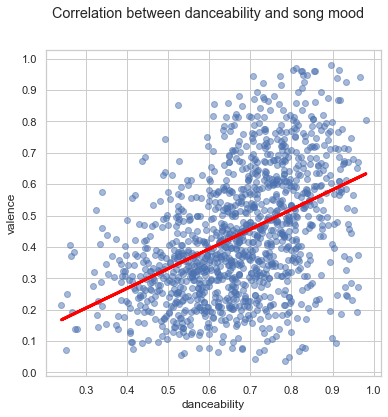

In [29]:
x = vpop["danceability"].values
y = vpop["valence"].values

x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)

regr = linear_model.LinearRegression()
regr.fit(x, y)

fig = plt.figure(figsize=(6, 6))
fig.suptitle("Correlation between danceability and song mood")

ax = plt.subplot(1, 1, 1)
ax.scatter(x, y, alpha=0.5)
ax.plot(x, regr.predict(x), color="red", linewidth=3)
plt.xticks(())
plt.yticks(())

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.02))

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.02))

plt.xlabel("danceability")
plt.ylabel("valence")

plt.show()

In [22]:
chosen = ["energy", "liveness", "tempo", "valence", "loudness", "speechiness", "acousticness", "danceability", "instrumentalness"]
text1 = vpop["names"] + " - " + vpop["genres"]
text2 = text1.values

X = vpop[chosen].values
y = vpop["danceability"].values

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

pca = PCA(n_components=3)
pca.fit(X)

X = pca.transform(X)

trace = go.Scatter3d(
    x=X[:,0],
    y=X[:,1],
    z=X[:,2],
    text=text2,
    mode="markers",
    marker=dict(
        size=8,
        color=y
    )
)

fig = go.Figure(data=[trace])
fig.show()